In [1]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.feature_selection import mutual_info_classif
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
path = r'C:\Users\Ithan Velarde\Desktop\Stage 2020\Horse Data\Small_dataset'
target_file = 'insight.json'
undesired_features = ['id', 'acidose', 'energy_hr', 'energy_speed', 'bpm_after_effort', 'bpm_after_15_min', 'v200', 'model',
                      'best_200', 'best_250', 'best500', 'best_600', 'mean_hr_first_trot', 'mean_speed_first_trot', 
                      'mean_symmetry_first_trot', 'mean_regularity_first_trot', 'mean_hr_first_canter', 
                      'mean_speed_first_canter', 'mean_regularity_first_canter', 'is_gallop', 'rating', 'sex', 'age_days']

In [3]:
def file_extraction(path):
    directories = glob.glob(path + '\*')
    tfiles = []
    files = []
    for d in directories:
        tfiles.extend(glob.glob(d + '\*'))
    for f in tfiles:
        if(target_file in f):
            files.append(f)
    return files

In [4]:
def file_to_panda(files):
    data = []
    for f in files:
        x = pd.read_json(f, orient='index')
        name = os.path.splitext(f)[0]
        name += '_MIX.json'
        x.name = name
        data.append(x)
    return data

In [5]:
def select_features(d):
    y = d.drop(undesired_features, axis=0)
    y = y.transpose()
    y.name = d.name
    return y

In [6]:
def write(d):
    d.to_json(d.name)

In [7]:
def merge(data, col):
    df = pd.DataFrame(columns=col)
    for d in data:
        df = df.append(d.transpose(), ignore_index=True)
    df.name = path + '\insight_all.json'
    return df

In [8]:
def column_extractor(data):
    mylist = []
    for d in data:
        mylist.extend(d.transpose().columns)
    return list(dict.fromkeys(mylist))

In [9]:
files = file_extraction(path)
data = file_to_panda(files)
columns = column_extractor(data)
df = merge(data, columns)
write(df)
df.describe()

,id,acidose,max_heart_rate,max_stride_frequency,max_stride_length,max_speed,energy_hr,energy_speed,bpm_after_effort,bpm_at_end,bpm_after_15_min,stride_frequency_at_60,stride_length_at_60,v200,duration,work_duration_seconds,distance,work_distance_meters,intensity,symmetry,regularity,max_acceleration,model,best_200,best_250,best500,best_600,time_best_200,time_best_400,time_best_600,time_best_800,time_best_1000,split_0_200,split_200_400,split_400_600,split_600_800,split_800_1000,split_1000_1200,split_1200_1400,mean_hr_first_trot,mean_speed_first_trot,mean_symmetry_first_trot,mean_regularity_first_trot,mean_hr_first_canter,mean_speed_first_canter,mean_regularity_first_canter,is_gallop,rating,sex,age_days
count,311,267,290,310,288,288,238,238,267,281,267,287,287,279,311,310,311,310,311,309,309,288,310,310,310,310,310,289.0,288.00,286.0,278.00,276.0,289.0,288.0,286.0,278.0,276.0,276.0,271.0,257,258,255,255,193,193,193,284,1,1,1
unique,311,93,88,46,88,121,238,237,88,78,96,42,46,65,59,169,228,157,48,99,72,168,290,60,69,200,247,99.0,134.00,158.0,159.00,179.0,121.0,104.0,93.0,100.0,95.0,100.0,90.0,89,27,74,51,82,71,62,1,1,1,1
top,31231,10,215,100,152,207,14635519,26826,110,53,54,115,145,39,33,0,0,0,0,141,93,114,"[{""name"": ""recovery"", ""type"": ""double_exponential_shifted"", ""formula"": ""x[0]*np.exp(x[1]*(t-x[4])) + x[2]*np.exp(x[3]*(t-x[4]))"", ""parameters"": [null, null, null, null, null], ""start_recovery_index"": null, ""bpm_at_end"": null}, {""name"": ""amplitude"", ""type"": ""inverse"", ""formula"": ""speed/(x[0]+x[1]*speed) + x[2]"", ""parameters"": [null, null, null]}]","{""time"": null}","{""time"": 14.0}","{""time"": null, ""splits"": [{""time"": null}, {""time"": null}]}","{""time"": null, ""splits"": [{""time"": null}, {""time"": null}, {""time"": null}]}",20.0,25.67,36.0,48.33,103.5,24.0,22.0,22.0,20.5,20.0,20.5,23.0,108,56,136,95,185,107,98,True,440,MALE,1585
freq,1,10,15,21,10,8,1,2,10,12,8,30,22,20,23,21,21,21,22,10,25,7,21,21,21,21,23,14.0,9.00,7.0,10.00,6.0,13.0,13.0,14.0,13.0,15.0,14.0,13.0,13,28,10,25,6,9,20,284,1,1,1


In [10]:
df, df.name = df.drop(undesired_features, axis=1), df.name
df.describe(include='all')
write(df)

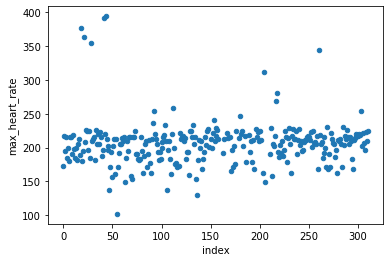

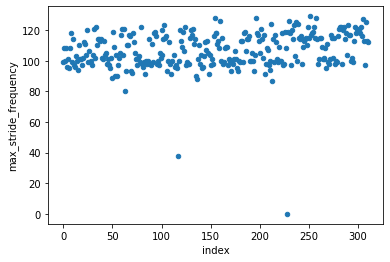

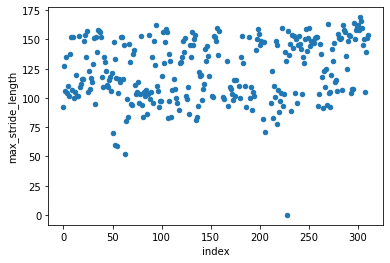

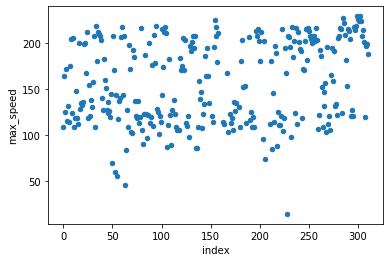

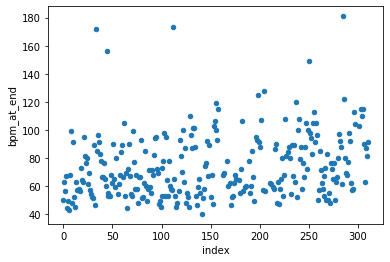

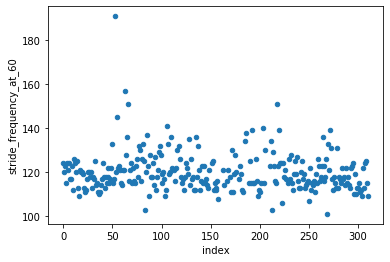

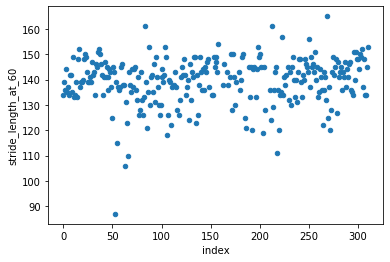

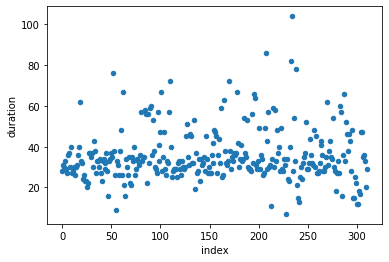

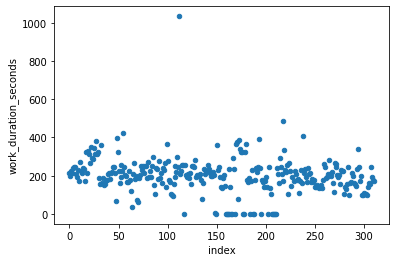

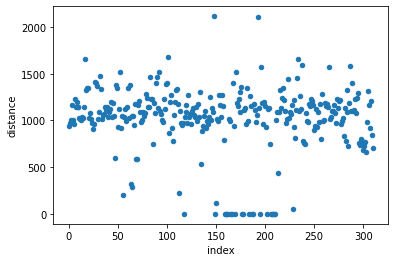

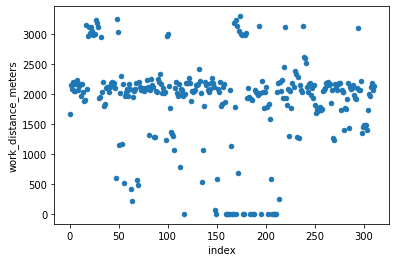

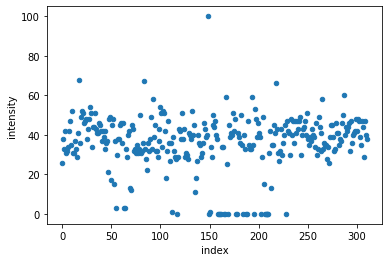

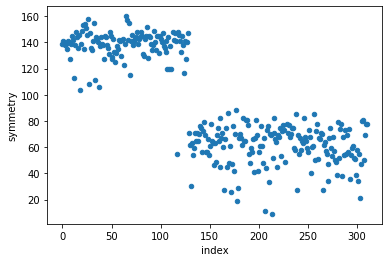

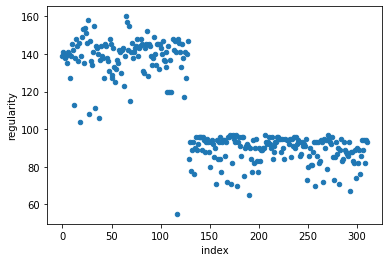

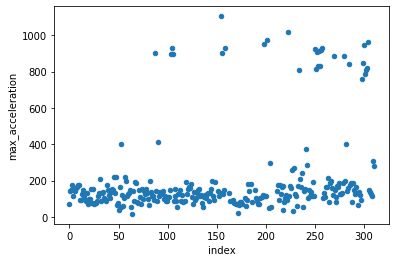

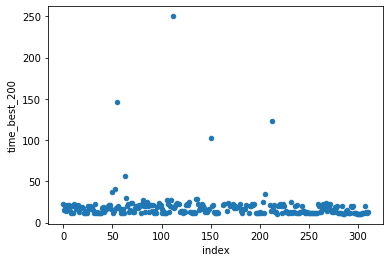

In [11]:
df.reset_index().plot.scatter(x = 'index', y='max_heart_rate')
df.reset_index().plot.scatter(x = 'index', y='max_stride_frequency')
df.reset_index().plot.scatter(x = 'index', y='max_stride_length')
df.reset_index().plot.scatter(x = 'index', y='max_speed')
df.reset_index().plot.scatter(x = 'index', y='bpm_at_end')
df.reset_index().plot.scatter(x = 'index', y='stride_frequency_at_60')
df.reset_index().plot.scatter(x = 'index', y='stride_length_at_60')
df.reset_index().plot.scatter(x = 'index', y='duration')
df.reset_index().plot.scatter(x = 'index', y='work_duration_seconds')
df.reset_index().plot.scatter(x = 'index', y='distance')
df.reset_index().plot.scatter(x = 'index', y='work_distance_meters')
df.reset_index().plot.scatter(x = 'index', y='intensity')
df.reset_index().plot.scatter(x = 'index', y='symmetry')
df.reset_index().plot.scatter(x = 'index', y='regularity')
df.reset_index().plot.scatter(x = 'index', y='max_acceleration')
df.reset_index().plot.scatter(x = 'index', y='time_best_200')

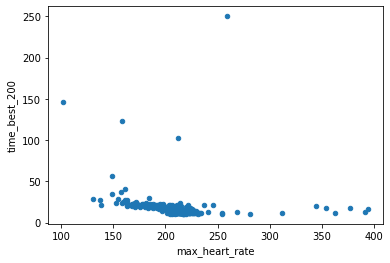

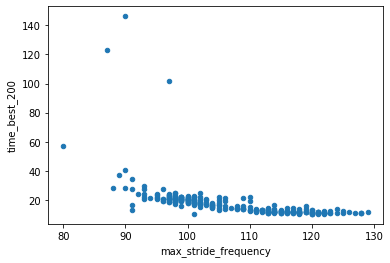

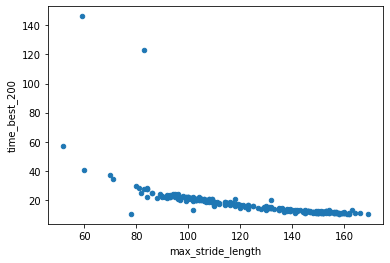

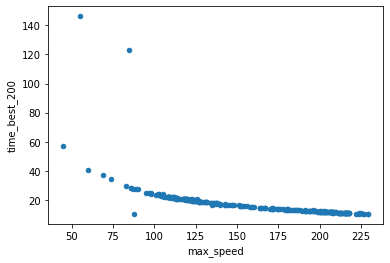

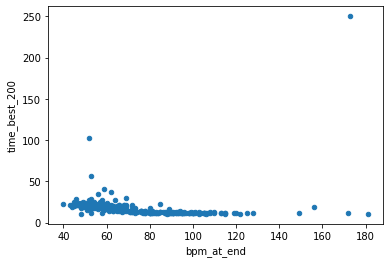

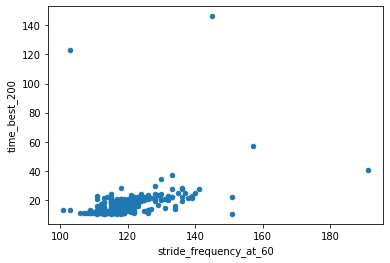

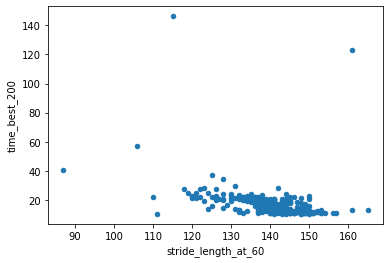

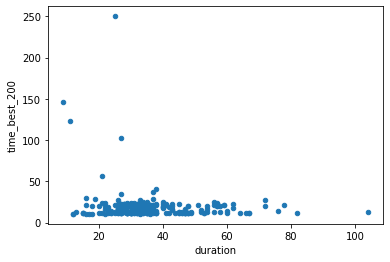

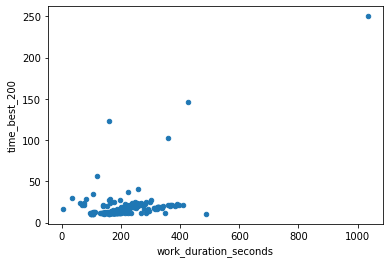

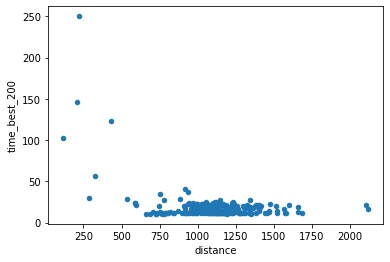

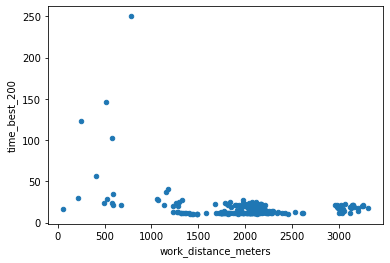

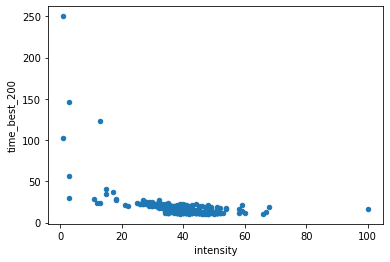

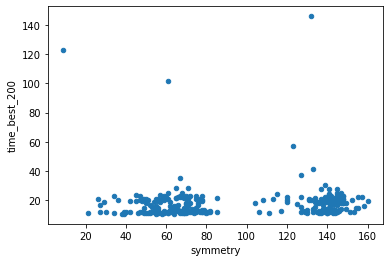

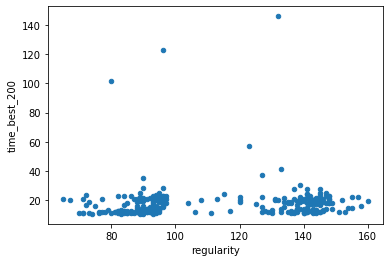

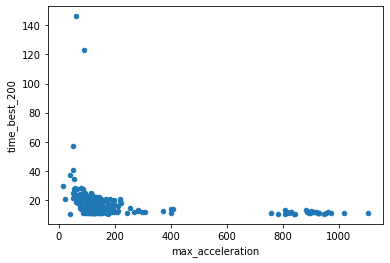

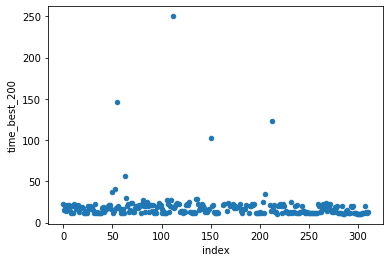

In [12]:
df.reset_index().plot.scatter(x='max_heart_rate', y='time_best_200')
df.reset_index().plot.scatter(x='max_stride_frequency', y='time_best_200')
df.reset_index().plot.scatter(x='max_stride_length', y='time_best_200')
df.reset_index().plot.scatter(x='max_speed', y='time_best_200')
df.reset_index().plot.scatter(x='bpm_at_end', y='time_best_200')
df.reset_index().plot.scatter(x='stride_frequency_at_60', y='time_best_200')
df.reset_index().plot.scatter(x='stride_length_at_60', y='time_best_200')
df.reset_index().plot.scatter(x='duration', y='time_best_200')
df.reset_index().plot.scatter(x='work_duration_seconds', y='time_best_200')
df.reset_index().plot.scatter(x='distance', y='time_best_200')
df.reset_index().plot.scatter(x='work_distance_meters', y='time_best_200')
df.reset_index().plot.scatter(x='intensity', y='time_best_200')
df.reset_index().plot.scatter(x='symmetry', y='time_best_200')
df.reset_index().plot.scatter(x='regularity', y='time_best_200')
df.reset_index().plot.scatter(x='max_acceleration', y='time_best_200')
df.reset_index().plot.scatter(x = 'index', y='time_best_200')

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['max_heart_rate', 'max_stride_frequency', 'max_stride_length', 'max_speed', 'bpm_at_end', 
              'stride_frequency_at_60', 'stride_length_at_60', 'duration', 'work_duration_seconds', 'distance',
              'work_distance_meters', 'intensity', 'symmetry', 'regularity', 'max_acceleration', 'time_best_200']
scatter_matrix(pd.read_json(r'C:\Users\Ithan Velarde\Desktop\Stage 2020\Horse Data\Small_dataset\insight_all.json'), alpha=0.2)

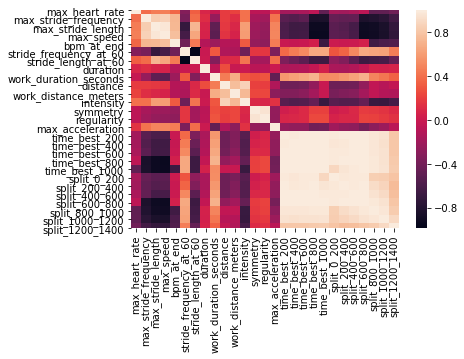

In [14]:
corr = pd.read_json(r'C:\Users\Ithan Velarde\Desktop\Stage 2020\Horse Data\Small_dataset\insight_all.json').corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns)

In [15]:
df

,max_heart_rate,max_stride_frequency,max_stride_length,max_speed,bpm_at_end,stride_frequency_at_60,stride_length_at_60,duration,work_duration_seconds,distance,work_distance_meters,intensity,symmetry,regularity,max_acceleration,time_best_200,time_best_400,time_best_600,time_best_800,time_best_1000,split_0_200,split_200_400,split_400_600,split_600_800,split_800_1000,split_1000_1200,split_1200_1400
0,173,99,92,108,50,124,134,28,212,936,1676,26,139,139,74,22.4,45,68.6,93.1,118.6,26.5,25.5,24.5,23.6,22.4,22.6,25.8
1,217,108,127,164,63,120,139,31,199,973,2150,38,141,141,142,14.67,29.83,45.17,60.67,77,17.67,16.33,15.5,15.17,14.67,15.33,17.83
2,195,100,106,125,56,123,136,30,226,1002,2095,33,140,140,150,19.5,39.5,59.5,80,100.5,21,20.5,20,19.5,20,20.5,21
3,216,108,135,172,67,115,144,33,216,1168,2200,42,138,138,178,14,28.67,44,59.33,76,20,16.67,15.33,14.67,14,15.33,17.5
4,185,96,104,115,44,124,135,29,239,1005,2050,31,139,139,113,21,42.5,64,85,106.5,24,23,21.5,21,21.5,21,21.5
5,200,101,110,131,49,121,137,27,247,965,2170,32,135,135,147,18.5,37.5,57,78,101.5,23,23.5,23.5,21,18.5,19,19.5
6,180,95,102,114,43,124,134,36,247,1231,2060,34,141,141,144,21.5,44,66.5,90,113.5,23.5,22.5,21.5,22.5,23.5,23,23.5
7,216,108,138,175,68,117,142,37,208,1140,2180,42,140,140,159,14,28.17,42.83,58.5,74.33,19,15.67,14.67,14,14.17,15.83,18.67
8,216,118,152,204,99,117,142,30,194,1195,2245,47,127,127,165,11.92,24.17,37.17,50.67,65,17.17,14.33,13.5,12.25,11.92,13,15.33
9,190,99,107,124,48,123,135,40,230,1140,2070,35,139,139,174,19.5,39.5,59.5,80,101,21.5,21,20,19.5,20,20.5,21.5
